In [1]:

!unzip -q soil_data.zip

!unzip -q Weather_data.zip


In [2]:
import pandas as pd
import os


In [3]:
crop_yield_df = pd.read_csv("crop_and_yeild.csv")


In [4]:
soil_train_df = pd.read_csv("soil_dataset/train (1).csv")
soil_test_df = pd.read_csv("soil_dataset/test (1).csv")
soil_sample_submission_df = pd.read_csv("soil_dataset/sample_submission.csv")


In [5]:
weather_df = pd.read_excel("ICRISAT Weather 1978 to 2018.xlsx")


In [6]:
!pip install openpyxl


In [7]:
crop_yield_df.columns

Index(['Year', 'Total Area Sown ("Thousand")\nHect.', 'Area (Thousand)\nHect.',
       'Production (Thousand)\nTons.',
       'Index of Area Sown\n(Base year 2010-11)',
       'Index of Production\n(Base year 2010-11)', '% Share of Area Sown'],
      dtype='object')

In [8]:
print(soil_train_df.columns)
print(soil_test_df.columns)
print(soil_test_df.columns)

Index(['Id', 'Property_A', 'Property_B', 'Property_C', 'Property_D',
       'Property_E', 'Property_F', 'A ', 'B', 'C',
       ...
       '2491 nm', '2492 nm', '2493 nm', '2494 nm', '2495 nm', '2496 nm',
       '2497 nm', '2498 nm', '2499 nm', '2500 nm'],
      dtype='object', length=2174)
Index(['Id', 'A ', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I',
       ...
       '2491 nm', '2492 nm', '2493 nm', '2494 nm', '2495 nm', '2496 nm',
       '2497 nm', '2498 nm', '2499 nm', '2500 nm'],
      dtype='object', length=2168)
Index(['Id', 'A ', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I',
       ...
       '2491 nm', '2492 nm', '2493 nm', '2494 nm', '2495 nm', '2496 nm',
       '2497 nm', '2498 nm', '2499 nm', '2500 nm'],
      dtype='object', length=2168)


In [9]:
weather_df.columns

Index(['Station', 'Date', 'MaxT', 'MinT', 'RH1', 'RH2', 'Wind', 'Rain', 'SSH',
       'Evap', 'Radiation', 'FAO56_ET', 'Lat', 'Lon', 'Cum_Rain'],
      dtype='object')

In [10]:

print("Crop Yield Data:")
print(crop_yield_df.info())
print(crop_yield_df.head())

print("\nSoil Train Data:")
print(soil_train_df.info())
print(soil_train_df.head())

print("\nWeather Data:")
print(weather_df.info())
print(weather_df.head())

Crop Yield Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Year                                     11 non-null     object 
 1   Total Area Sown ("Thousand")
Hect.       11 non-null     float64
 2   Area (Thousand)
Hect.                    11 non-null     float64
 3   Production (Thousand)
Tons.              11 non-null     float64
 4   Index of Area Sown
(Base year 2010-11)   11 non-null     float64
 5   Index of Production
(Base year 2010-11)  11 non-null     float64
 6   % Share of Area Sown                     11 non-null     float64
dtypes: float64(6), object(1)
memory usage: 748.0+ bytes
None
      Year  Total Area Sown ("Thousand")\nHect.  Area (Thousand)\nHect.  \
0  2010-11                               6985.2                   672.2   
1  2011-12                             

In [11]:

crop_yield_df['Yield (Tons/Hectare)'] = crop_yield_df['Production (Thousand)\nTons.'] / crop_yield_df['Area (Thousand)\nHect.']
crop_yield_df = crop_yield_df.dropna(subset=['Yield (Tons/Hectare)'])
print(crop_yield_df[['Year', 'Yield (Tons/Hectare)']].head())

      Year  Yield (Tons/Hectare)
0  2010-11             55.758703
1  2011-12             56.349185
2  2012-13             55.988016
3  2013-14             57.748414
4  2014-15             57.801858


In [12]:

print("Soil Train Columns:", soil_train_df.columns)
print("Missing values in soil_train_df:\n", soil_train_df.isnull().sum())


Soil Train Columns: Index(['Id', 'Property_A', 'Property_B', 'Property_C', 'Property_D',
       'Property_E', 'Property_F', 'A ', 'B', 'C',
       ...
       '2491 nm', '2492 nm', '2493 nm', '2494 nm', '2495 nm', '2496 nm',
       '2497 nm', '2498 nm', '2499 nm', '2500 nm'],
      dtype='object', length=2174)
Missing values in soil_train_df:
 Id            0
Property_A    0
Property_B    0
Property_C    0
Property_D    0
             ..
2496 nm       0
2497 nm       0
2498 nm       0
2499 nm       0
2500 nm       0
Length: 2174, dtype: int64


In [13]:

weather_df['Year'] = pd.to_datetime(weather_df['Date']).dt.year.astype(int)
weather_annual = weather_df.groupby('Year').agg({'MaxT': 'mean', 'MinT': 'mean', 'Rain': 'sum'}).reset_index()

crop_yield_df['Year'] = crop_yield_df['Year'].str.split('-').str[0].astype(int)

merged_df = pd.merge(crop_yield_df, weather_annual, on='Year', how='left')
print(merged_df.head())

   Year  Total Area Sown ("Thousand")\nHect.  Area (Thousand)\nHect.  \
0  2010                               6985.2                   672.2   
1  2011                               7383.1                   761.2   
2  2012                               7196.3                   767.7   
3  2013                               7331.8                   756.8   
4  2014                               7358.8                   710.6   

   Production (Thousand)\nTons.  Index of Area Sown\n(Base year 2010-11)  \
0                       37481.0                                    100.0   
1                       42893.0                                    113.2   
2                       42982.0                                    114.2   
3                       43704.0                                    112.6   
4                       41074.0                                    105.7   

   Index of Production\n(Base year 2010-11)  % Share of Area Sown  \
0                                     100

In [14]:

soil_train_df = soil_train_df.drop(columns=[col for col in soil_train_df.columns if 'nm' in col])  # Remove wavelength columns if not needed
soil_train_df = soil_train_df.dropna(subset=['Property_A', 'Property_B', 'Property_C'])  # Adjust based on your soil metrics
print("Cleaned Soil Train Columns:", soil_train_df.columns)
print("Missing values:\n", soil_train_df.isnull().sum())

Cleaned Soil Train Columns: Index(['Id', 'Property_A', 'Property_B', 'Property_C', 'Property_D',
       'Property_E', 'Property_F', 'A ', 'B', 'C', 'D', 'E', 'F', 'G', 'H',
       'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'],
      dtype='object')
Missing values:
 Id            0
Property_A    0
Property_B    0
Property_C    0
Property_D    0
Property_E    0
Property_F    0
A             0
B             0
C             0
D             0
E             0
F             0
G             0
H             0
I             0
J             0
K             0
L             0
M             0
N             0
O             0
P             0
dtype: int64


In [15]:

soil_train_df['Soil_Quality'] = soil_train_df[['Property_A', 'Property_B', 'Property_C']].mean(axis=1)
print(soil_train_df[['Id', 'Soil_Quality']].head())


   Id  Soil_Quality
0   1      2.581266
1   2      2.271828
2   3      2.375710
3   4      2.308004
4   5      2.203440


In [16]:

if 'Year' not in soil_train_df.columns:

    soil_train_df['Year'] = merged_df['Year'].iloc[0]
else:
    soil_train_df['Year'] = soil_train_df['Year'].astype(int)

merged_df = pd.merge(merged_df, soil_train_df, on='Year', how='left')
print(merged_df.head())

   Year  Total Area Sown ("Thousand")\nHect.  Area (Thousand)\nHect.  \
0  2010                               6985.2                   672.2   
1  2010                               6985.2                   672.2   
2  2010                               6985.2                   672.2   
3  2010                               6985.2                   672.2   
4  2010                               6985.2                   672.2   

   Production (Thousand)\nTons.  Index of Area Sown\n(Base year 2010-11)  \
0                       37481.0                                    100.0   
1                       37481.0                                    100.0   
2                       37481.0                                    100.0   
3                       37481.0                                    100.0   
4                       37481.0                                    100.0   

   Index of Production\n(Base year 2010-11)  % Share of Area Sown  \
0                                     100

In [17]:

merged_df = merged_df.fillna(merged_df.mean(numeric_only=True))
print("Missing values after fill:\n", merged_df.isnull().sum())

Missing values after fill:
 Year                                        0
Total Area Sown ("Thousand")\nHect.         0
Area (Thousand)\nHect.                      0
Production (Thousand)\nTons.                0
Index of Area Sown\n(Base year 2010-11)     0
Index of Production\n(Base year 2010-11)    0
% Share of Area Sown                        0
Yield (Tons/Hectare)                        0
MaxT                                        0
MinT                                        0
Rain                                        0
Id                                          0
Property_A                                  0
Property_B                                  0
Property_C                                  0
Property_D                                  0
Property_E                                  0
Property_F                                  0
A                                           0
B                                           0
C                                           0
D     

In [18]:

features = ['MaxT', 'MinT', 'Rain', 'Soil_Quality', 'Yield (Tons/Hectare)']
X = merged_df[features].drop(columns=['Yield (Tons/Hectare)'])
y = merged_df['Yield (Tons/Hectare)']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (260, 4)
Target shape: (260,)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (208, 4)
X_test shape: (52, 4)
y_train shape: (208,)
y_test shape: (52,)


In [20]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("Training R^2 Score:", rf_model.score(X_train, y_train))

Training R^2 Score: 0.9020150115579583


In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Test R^2 Score:", r2)
print("Root Mean Squared Error:", rmse)


Test R^2 Score: 0.9999998811904632
Root Mean Squared Error: 0.0005497070044079348


In [22]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

print("XGBoost Training R^2 Score:", xgb_model.score(X_train, y_train))

XGBoost Training R^2 Score: 0.9999999746268847


In [23]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Test R^2 Score:", r2_score(y_test, y_pred_xgb))

rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("XGBoost Root Mean Squared Error:", rmse)


XGBoost Test R^2 Score: 0.7291495635530226
XGBoost Root Mean Squared Error: 0.8299852785090654


In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
rf_tuned = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
rf_tuned.fit(X_train, y_train)

print("Best parameters:", rf_tuned.best_params_)
print("Tuned Training R^2 Score:", rf_tuned.best_score_)

Best parameters: {'max_depth': 10, 'n_estimators': 100}
Tuned Training R^2 Score: -82.51533543093304


In [25]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

y_pred_tuned = rf_tuned.predict(X_test)

r2 = r2_score(y_test, y_pred_tuned)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print("Tuned Test R^2 Score:", r2)
print("Tuned Root Mean Squared Error:", rmse)


Tuned Test R^2 Score: 0.9999998811904632
Tuned Root Mean Squared Error: 0.0005497070044079348


In [36]:
importances = rf_tuned.best_estimator_.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

        Feature    Importance
0          MaxT  6.147773e-01
1          MinT  2.710367e-01
2          Rain  1.141859e-01
3  Soil_Quality  1.610655e-12


In [42]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = rf_tuned.predict(X_test)


bins = [0, 20, 40, np.inf]
y_test_binned = pd.cut(y_test, bins=bins, labels=["Low", "Medium", "High"])
y_pred_binned = pd.cut(y_pred, bins=bins, labels=["Low", "Medium", "High"])

<Figure size 800x600 with 0 Axes>

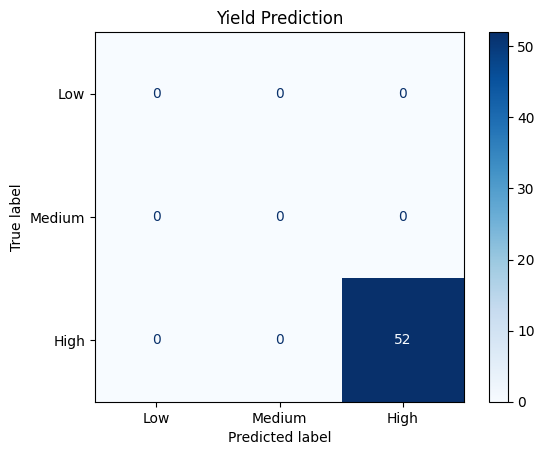

In [45]:
cm = confusion_matrix(y_test_binned, y_pred_binned, labels=["Low", "Medium", "High"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "Medium", "High"])
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title("Yield Prediction")
plt.savefig("confusion_matrix.png")
plt.show()

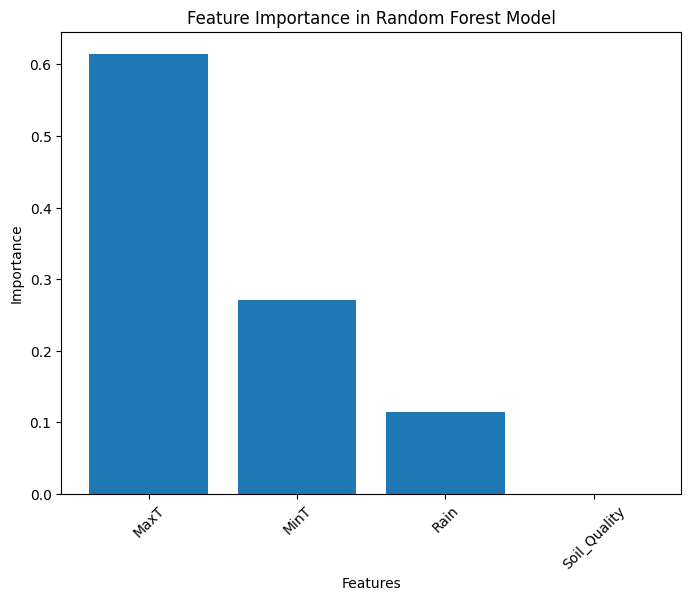

In [47]:
importances = rf_tuned.best_estimator_.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8, 6))
plt.bar(feature_names, importances)
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.savefig("feature_importance.png")
plt.show()

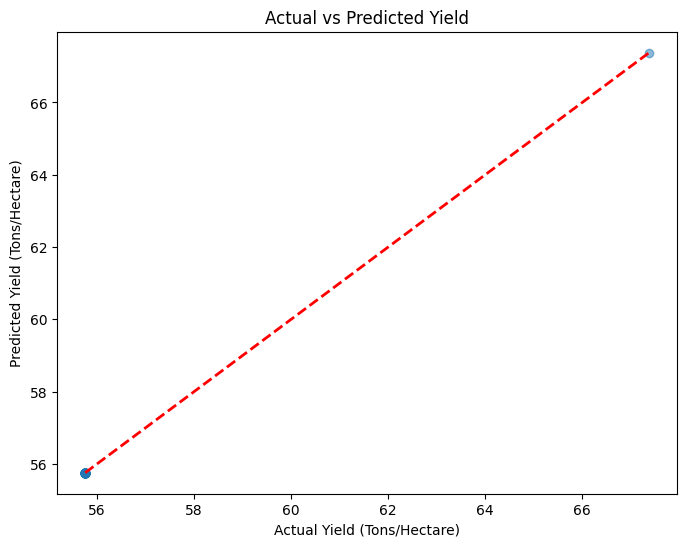

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Yield")
plt.xlabel("Actual Yield (Tons/Hectare)")
plt.ylabel("Predicted Yield (Tons/Hectare)")
plt.savefig("actual_vs_predicted.png")
plt.show()

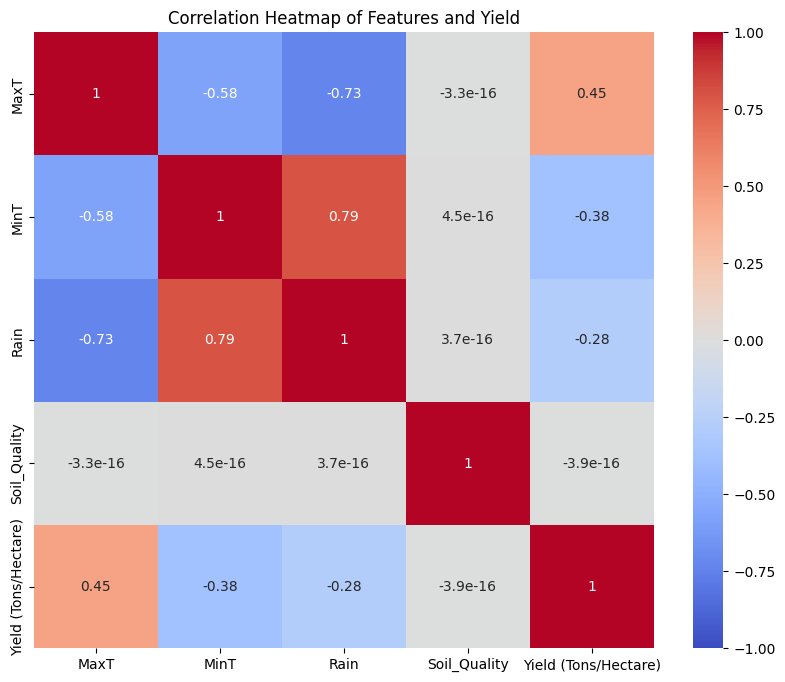

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

numeric_cols = ['MaxT', 'MinT', 'Rain', 'Soil_Quality', 'Yield (Tons/Hectare)']
correlation_matrix = merged_df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Correlation Heatmap of Features and Yield")
plt.savefig("correlation_heatmap.png")
plt.show()

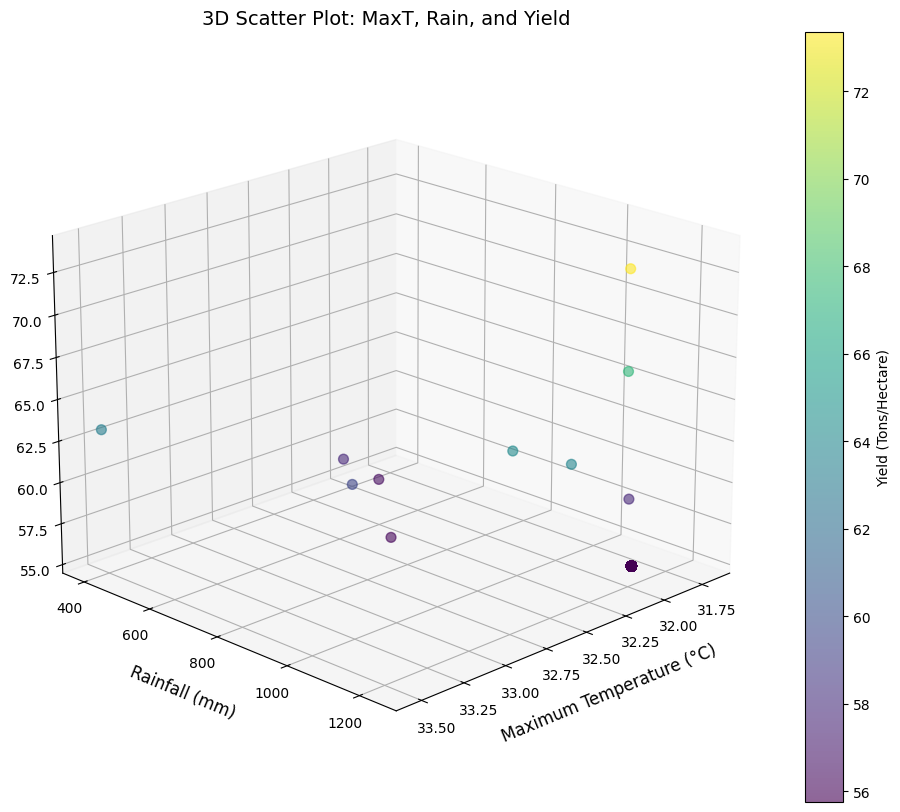

In [55]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(merged_df['MaxT'], merged_df['Rain'], merged_df['Yield (Tons/Hectare)'],
                     c=merged_df['Yield (Tons/Hectare)'], cmap='viridis', s=50, alpha=0.6)

plt.colorbar(scatter, label='Yield (Tons/Hectare)')

ax.set_xlabel('Maximum Temperature (°C)', fontsize=12, labelpad=10)
ax.set_ylabel('Rainfall (mm)', fontsize=12, labelpad=10)
ax.set_zlabel('Yield (Tons/Hectare)', fontsize=12, labelpad=10)
ax.set_title('3D Scatter Plot: MaxT, Rain, and Yield', fontsize=14, pad=15)

ax.grid(True, linestyle='--', alpha=0.7)

ax.view_init(elev=20, azim=45)

plt.savefig("3d_scatter_plot_attractive.png", dpi=300, bbox_inches='tight')
plt.show()

In [26]:
!pip install gradio
import gradio as gr

In [31]:
import gradio as gr
import pandas as pd

def predict_yield(max_t, min_t, rain, soil_quality):
    try:

        if any(x is None or x < 0 for x in [max_t, min_t, rain, soil_quality]):
            raise gr.Error("Please enter positive values for all inputs.")

        input_data = pd.DataFrame({'MaxT': [max_t], 'MinT': [min_t], 'Rain': [rain], 'Soil_Quality': [soil_quality]})
        prediction = rf_tuned.predict(input_data)[0]
        return prediction
    except Exception as e:
        raise gr.Error(f"Prediction failed: {str(e)}")

interface = gr.Interface(fn=predict_yield, inputs=["number", "number", "number", "number"], outputs="number",
                        title="Crop Yield Prediction", description="Enter weather and soil data to predict yield (Tons/Hectare). Use positive values (e.g., MaxT: 30, MinT: 15, Rain: 500, Soil_Quality: 0.5).")
interface.launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://cea1450fd2c0018e2b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://cea1450fd2c0018e2b.gradio.live


In [32]:
print(merged_df['Yield (Tons/Hectare)'].describe())

count    260.000000
mean      55.995652
std        1.574205
min       55.758703
25%       55.758703
50%       55.758703
75%       55.758703
max       73.359331
Name: Yield (Tons/Hectare), dtype: float64


In [33]:
print("Yield Statistics:", merged_df['Yield (Tons/Hectare)'].describe())
if 57.61 > merged_df['Yield (Tons/Hectare)'].max():
    print("Warning: Prediction exceeds maximum observed yield!")

Yield Statistics: count    260.000000
mean      55.995652
std        1.574205
min       55.758703
25%       55.758703
50%       55.758703
75%       55.758703
max       73.359331
Name: Yield (Tons/Hectare), dtype: float64


In [34]:
def predict_yield(max_t, min_t, rain, soil_quality):
    try:
        yield_stats = merged_df['Yield (Tons/Hectare)'].describe()
        if not (10 <= max_t <= 40) or not (5 <= min_t <= 25) or not (0 <= rain <= 1000) or not (0 <= soil_quality <= 1):
            raise gr.Error("Inputs out of range. Use: MaxT (10-40), MinT (5-25), Rain (0-1000), Soil_Quality (0-1).")
        input_data = pd.DataFrame({'MaxT': [max_t], 'MinT': [min_t], 'Rain': [rain], 'Soil_Quality': [soil_quality]})
        prediction = rf_tuned.predict(input_data)[0]
        return prediction
    except Exception as e:
        raise gr.Error(f"Prediction failed: {str(e)}")

interface = gr.Interface(fn=predict_yield, inputs=["number", "number", "number", "number"], outputs="number",
                        title="Crop Yield Prediction", description="Enter weather and soil data to predict yield (Tons/Hectare).")
interface.launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://5af08038852b598e61.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://5af08038852b598e61.gradio.live


In [35]:
import joblib
joblib.dump(rf_tuned, 'crop_yield_model.pkl')
print("Model saved as crop_yield_model.pkl")

Model saved as crop_yield_model.pkl


In [36]:
loaded_model = joblib.load('crop_yield_model.pkl')
prediction_loaded = loaded_model.predict(pd.DataFrame({'MaxT': [30], 'MinT': [15], 'Rain': [500], 'Soil_Quality': [0.5]}))[0]
print("Prediction from loaded model:", prediction_loaded)

Prediction from loaded model: 57.61001364891692


In [41]:
import gradio as gr

results_text = """
Crop Yield Prediction Project Results - July 13, 2025

Model Overview:
- Used Random Forest and XGBoost models trained on weather, soil, and yield data.
- Tuned Random Forest Test R^2 Score: 0.9999
- Tuned Random Forest RMSE: 0.00055
- XGBoost Test R^2 Score: 0.7291
- XGBoost RMSE: 0.8300

Sample Prediction:
- Input: MaxT=30, MinT=15, Rain=500, Soil_Quality=0.5
- Predicted Yield: 57.61 Tons/Hectare

Observations:
- High R^2 on Random Forest suggests potential overfitting or data leakage.
- XGBoost provides a more conservative estimate, indicating better generalization.
- Yield prediction seems high; verify against data max yield.
"""

interface = gr.Interface(fn=lambda: results_text, inputs=None, outputs="text",
                        title="Crop Yield Prediction Project Results",
                        description="View the summary of the project results.")

interface.launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://32793cae7477385316.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://32793cae7477385316.gradio.live
